In [1]:
import torch
import numpy as np
import torch.nn as nn
import src.week6 as wk6
import seaborn as sns
import os

In [2]:
weights = torch.load('./data/model_weights.pt', map_location='cpu')
convnet = torch.load('./data/model.pt', map_location='cpu')
convnet.eval()

C:\Users\likkhian\Anaconda3\envs\py3env\lib\site-packages\torch\serialization.py:434: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
C:\Users\likkhian\Anaconda3\envs\py3env\lib\site-packages\torch\serialization.py:434: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
C:\Users\likkhian\Anaconda3\envs\py3env\lib\site-packages\torch\serialization.py:434: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original sour

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [3]:
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF

class TensorDataset(Dataset):
    def __init__(self, tensor):
        self.tensor = tensor
        self.resize = transforms.Resize(size=(224,224))
    def __getitem__(self):
        out = self.tensor
        out = TF.to_pil_image(out)
        out = self.resize(out)
        out = TF.to_tensor(out).unsqueeze_(0)
        return out
    def __len__(self):
        return self.tensor.size(0)

def process_raw(path):
    inp = wk6.process_image(path)
#     print(np.shape(inp))
    inp2 = np.moveaxis(inp,-1,0)
    return inp2

tensor([[ 2.1828,  0.1748, -2.1182]], grad_fn=<AddmmBackward>)
your deity is...  mercy


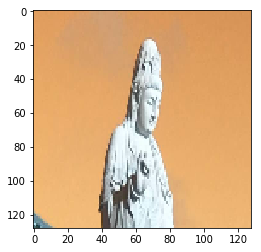

tensor([[ 1.7241, -1.3832, -0.1278]], grad_fn=<AddmmBackward>)
your deity is...  mercy


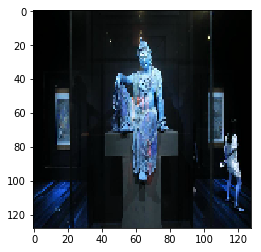

tensor([[ 5.9462, -0.0065, -5.5158]], grad_fn=<AddmmBackward>)
your deity is...  mercy


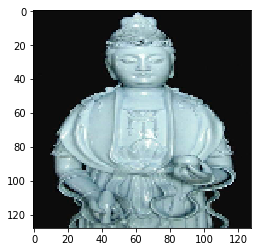

tensor([[ 1.6714,  0.8111, -1.9599]], grad_fn=<AddmmBackward>)
your deity is...  mercy


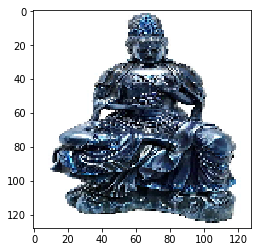

tensor([[ 1.6850,  1.9659, -2.9025]], grad_fn=<AddmmBackward>)
your deity is...  happy


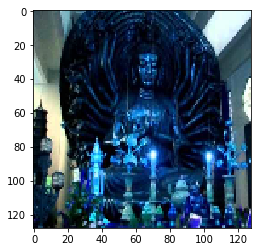

tensor([[-4.6221,  6.6282, -1.6995]], grad_fn=<AddmmBackward>)
your deity is...  happy


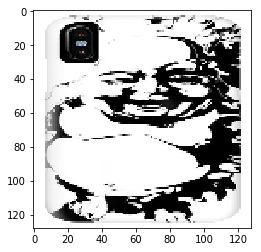

tensor([[ 2.0845,  0.9709, -2.7460]], grad_fn=<AddmmBackward>)
your deity is...  mercy


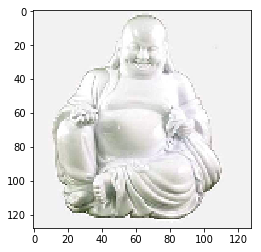

tensor([[ 0.7813, -1.8299,  1.7049]], grad_fn=<AddmmBackward>)
your deity is...  monkey


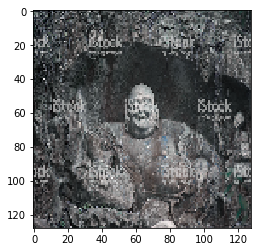

tensor([[-0.6277,  1.3203, -0.0426]], grad_fn=<AddmmBackward>)
your deity is...  happy


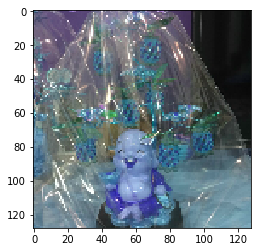

tensor([[-3.4809,  5.4839, -1.9120]], grad_fn=<AddmmBackward>)
your deity is...  happy


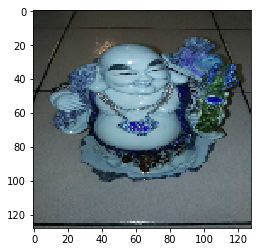

tensor([[-2.2148, -2.3365,  5.5275]], grad_fn=<AddmmBackward>)
your deity is...  monkey


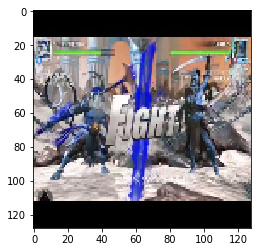

tensor([[-2.6564,  0.2389,  2.5679]], grad_fn=<AddmmBackward>)
your deity is...  monkey


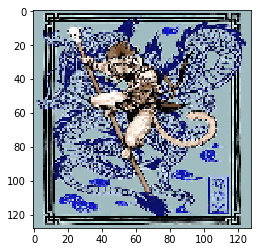

tensor([[-1.7125, -3.0492,  5.4083]], grad_fn=<AddmmBackward>)
your deity is...  monkey


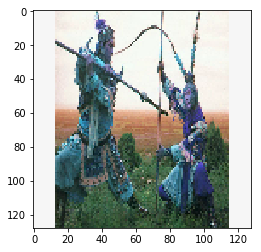

tensor([[-0.3766, -5.5273,  6.3546]], grad_fn=<AddmmBackward>)
your deity is...  monkey


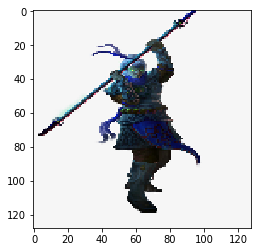

tensor([[-1.8243, -0.9369,  3.4483]], grad_fn=<AddmmBackward>)
your deity is...  monkey


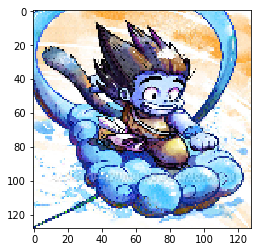

Wall time: 14.2 s


In [10]:
%%time
import matplotlib.pyplot as plt
import cv2
validation_images = os.listdir('./data/validate/')
labels = {0:'mercy', 1:'happy', 2:'monkey'}
def predict(path):
    inp = process_raw(path)
    test_img = TensorDataset(torch.from_numpy(inp).float())
    output = convnet(test_img.__getitem__())
    print(output)
    _, predicted = torch.max(output.data, 1)
#     print(np.shape(inp))
    plt.imshow( np.moveaxis(inp,0,-1))
    print('your deity is... ',labels[predicted.item()])
    plt.show()

for ii in range(len(validation_images)):
    plt.figure(ii+1)
    predict('./data/validate/'+validation_images[ii])
    plt.show()

In [5]:
from sklearn.model_selection import train_test_split
all_data = np.load('./data/processed/ideityfy.npz')
X_all = all_data['X']/255
X_all = np.moveaxis(X_all, -1, 1)
y_all = all_data['y']
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=50)

In [6]:
class TensorDataset2(Dataset):
    def __init__(self, tensor, labels):
        self.tensor = tensor
        self.labels = labels
        self.resize = transforms.Resize(size=(224,224))
    def __getitem__(self, index):
        out = self.tensor[index]
        out = TF.to_pil_image(out)
        out = self.resize(out)
        out = TF.to_tensor(out)
#         out = TF.to_tensor(out).unsqueeze_(0)
        return out, self.labels[index]
    def __len__(self):
        return self.tensor.size(0)

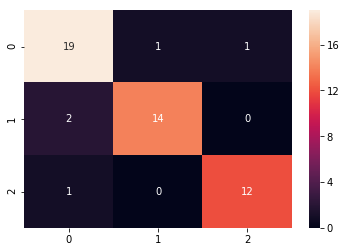

In [7]:
from sklearn.metrics import confusion_matrix

testtest = TensorDataset2(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())
# dd, vall =  testtest.__getitem__(9)
testtestloader = DataLoader(testtest, batch_size=1, shuffle=False)
pred = []
labels = []
for i, data in enumerate(testtestloader):
    inp, label = data
    output = convnet(inp)
    _, predicted = torch.max(output.data, 1)
    pred.append(predicted)
    labels.append(label)
#     print(predicted, labels)
sns.heatmap(confusion_matrix(labels,pred), annot=True, fmt="d")

In [8]:
# # Realized i did not save the model itself, so have to rebuild
# from torchvision import models
# net = models.resnet50(pretrained=True)
# for param in net.parameters():
#         param.requires_grad = False
# num_features = net.fc.in_features
# net.fc = nn.Linear(num_features, 3)
# torch.save(net, './data/model_levels.pt')
